<a href="https://colab.research.google.com/github/AmirAzz/Test/blob/main/yolo_track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -r /content/requirements.txt


  Using cached ultralytics-8.0.33-py3-none-any.whl (275 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 85.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB

In [9]:
!pip install filterpy

  Using cached filterpy-1.4.5-py3-none-any.whl


In [12]:
import os
import random

import cv2
from ultralytics import YOLO



In [14]:
!git clone https://github.com/nwojke/deep_sort.git

Cloning into 'deep_sort'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 65.59 KiB | 589.00 KiB/s, done.
Resolving deltas: 100% (78/78), done.


In [15]:
video_path = os.path.join('.', 'data', '/content/video (240p).mp4')

In [17]:
video_out_path = os.path.join('.', 'out.mp4')

In [18]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

In [19]:
cap_out = cv2.VideoWriter(video_out_path, cv2.VideoWriter_fourcc(*'MP4V'), cap.get(cv2.CAP_PROP_FPS),
                          (frame.shape[1], frame.shape[0]))

In [20]:
cv2.imshow('frame',frame)
cv2.waitKey(25)
ret,frame=cap.read()
cap.release
cv2.destroyAllWindows

DisabledFunctionError: ignored

In [21]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]


In [25]:
from '/content/tracker.py' import Tracker

SyntaxError: ignored

In [26]:
colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(10)]

detection_threshold = 0.5
while ret:

    results = model(frame)

    for result in results:
        detections = []
        for r in result.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = r
            x1 = int(x1)
            x2 = int(x2)
            y1 = int(y1)
            y2 = int(y2)
            class_id = int(class_id)
            if score > detection_threshold:
                detections.append([x1, y1, x2, y2, score])

       # tracker.update(frame, detections)

      #  for track in tracker.tracks:
        #    bbox = track.bbox
         #   x1, y1, x2, y2 = bbox
         #   track_id = track.track_id

          #  cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (colors[track_id % len(colors)]), 3)

    cap_out.write(frame)
    ret, frame = cap.read()

cap.release()
cap_out.release()
cv2.destroyAllWindows()



0: 384x640 7 persons, 147.6ms
Speed: 3.5ms preprocess, 147.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 132.0ms
Speed: 2.7ms preprocess, 132.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 141.1ms
Speed: 2.7ms preprocess, 141.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 131.3ms
Speed: 2.6ms preprocess, 131.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 131.3ms
Speed: 2.7ms preprocess, 131.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 137.4ms
Speed: 2.6ms preprocess, 137.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 139.1ms
Speed: 2.5ms preprocess, 139.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 126.2ms
Speed: 2.7ms preprocess, 126.2ms inference, 1.0ms postprocess per 

In [31]:
from tracker import Tracker

ModuleNotFoundError: ignored

In [30]:
!pip install scikit-image==0.19.3



In [1]:
!nvidia-smi

Wed Jul 19 09:57:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [21]:
SOURCE_VIDEO_PATH = "/content/production_id_3740032 (2160p).mp4"

In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [5]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [6]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [7]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [8]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [9]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [10]:
# settings
MODEL = "yolov8x.pt"

In [11]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:02<00:00, 48.5MB/s]
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients


In [14]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0]


0: 384x640 14 persons, 1 backpack, 5 suitcases, 63.9ms
Speed: 3.2ms preprocess, 63.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


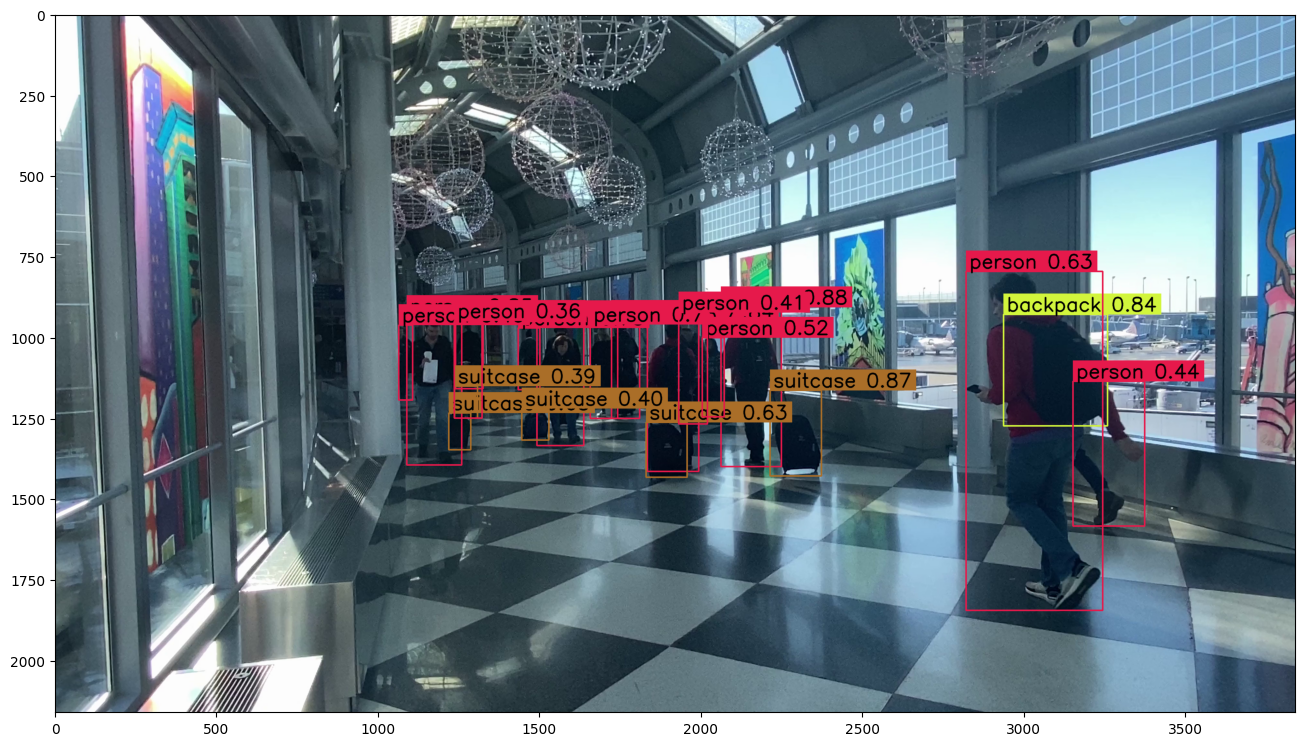

In [22]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [18]:
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result.mp4"

In [19]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1920, height=1080, fps=29, total_frames=198)

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/539 [00:00<?, ?it/s]


0: 384x640 14 persons, 1 backpack, 5 suitcases, 63.3ms
Speed: 4.0ms preprocess, 63.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 backpack, 5 suitcases, 1 clock, 63.1ms
Speed: 3.3ms preprocess, 63.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 backpack, 8 suitcases, 1 clock, 63.2ms
Speed: 3.5ms preprocess, 63.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 airplane, 1 backpack, 5 suitcases, 63.2ms
Speed: 3.5ms preprocess, 63.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 airplane, 2 backpacks, 6 suitcases, 1 clock, 63.1ms
Speed: 3.7ms preprocess, 63.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 airplane, 2 backpacks, 5 suitcases, 1 clock, 63.2ms
Speed: 3.6ms preprocess, 63.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x